In [1]:
import numpy as np  #Linear Algebra Arrays matrix
import pandas as pd #Data Pre-processing data manipulation 
import seaborn as sns #Plotting data exploration and visulization
import matplotlib.pyplot as plt #plotting

In [2]:
df = pd.read_csv("Groceries_dataset.csv", parse_dates=['Date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_11652\2123702316.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("Groceries_dataset.csv", parse_dates=['Date'])


In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.2+ MB


In [7]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,2015-07-21,tropical fruit,2015-07-21
1,2552,2015-01-05,whole milk,2015-01-05
2,2300,2015-09-19,pip fruit,2015-09-19
3,1187,2015-12-12,other vegetables,2015-12-12
4,3037,2015-02-01,whole milk,2015-02-01


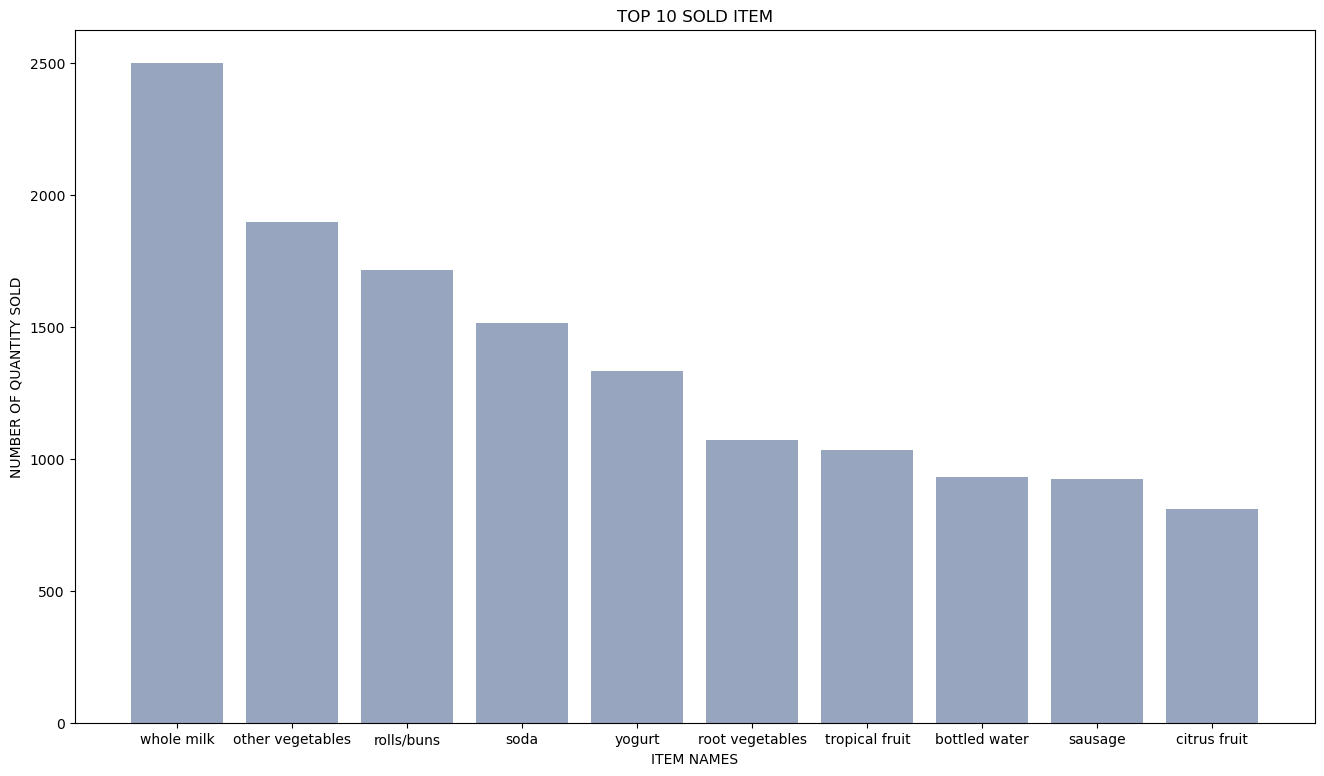

In [8]:
Item_distr = df.groupby(by = 'itemDescription').size().reset_index(name= 'Frequency').sort_values(by = 'Frequency', ascending = False).head(10)

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos, height, color=(0.2, 0.3,0.5,0.5))

plt.title("TOP 10 SOLD ITEM")
plt.xlabel("ITEM NAMES")
plt.ylabel("NUMBER OF QUANTITY SOLD")

plt.xticks(x_pos, bars)
plt.show()

In [9]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
2015-07-21,1808,tropical fruit,2015-07-21
2015-01-05,2552,whole milk,2015-01-05
2015-09-19,2300,pip fruit,2015-09-19
2015-12-12,1187,other vegetables,2015-12-12
2015-02-01,3037,whole milk,2015-02-01
...,...,...,...
2014-10-08,4471,sliced cheese,2014-10-08
2014-02-23,2022,candy,2014-02-23
2014-04-16,1097,cake bar,2014-04-16


[Text(0.5, 0, 'date'), Text(0, 0.5, 'NUMBER OF ITEM SOLD')]

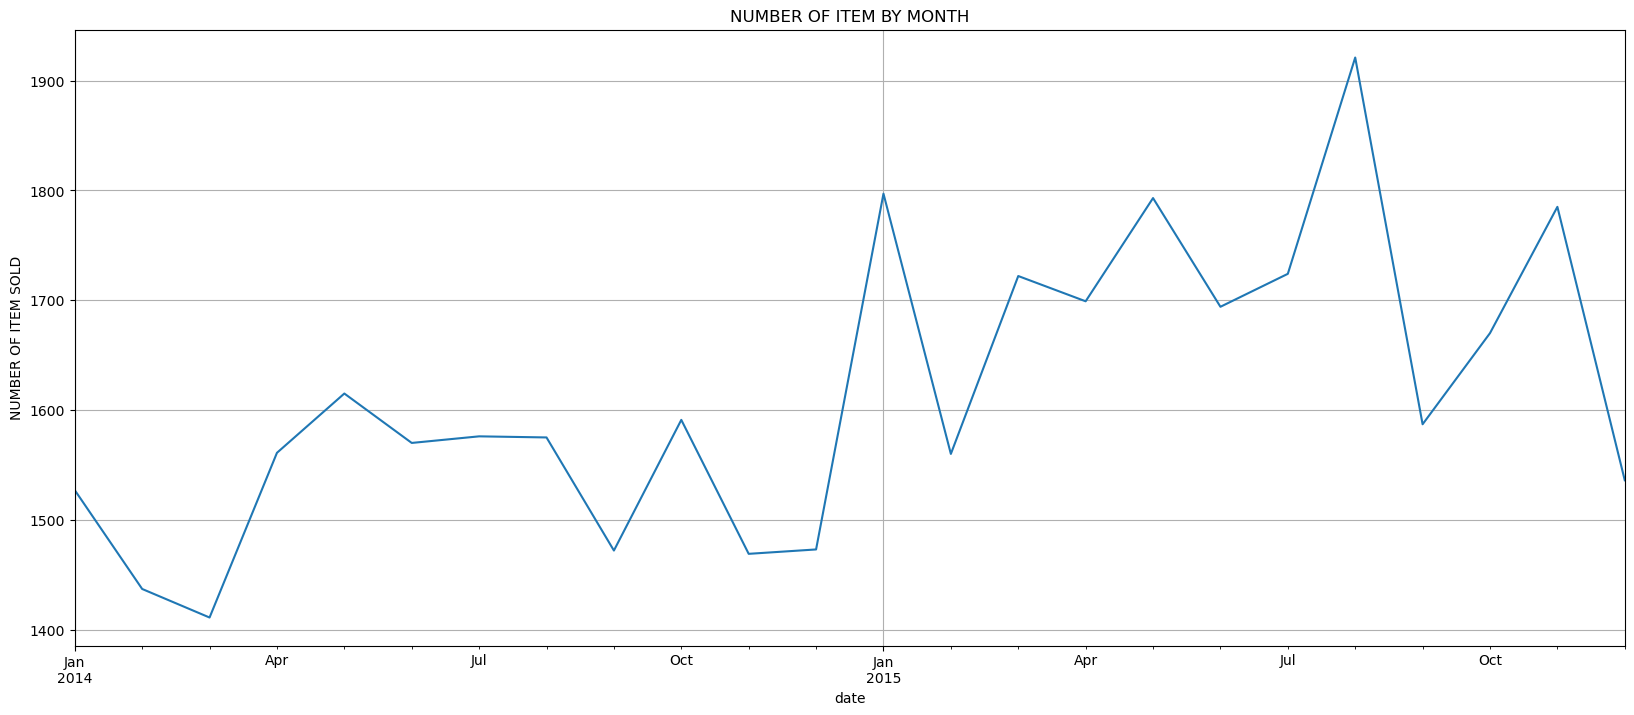

In [10]:
df_date.resample("M")["itemDescription"].count().plot(figsize = (20,8),  grid = True, title = "NUMBER OF ITEM BY MONTH").set(xlabel="date", ylabel="NUMBER OF ITEM SOLD")

In [11]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by= "Member_number", ascending = False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [12]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]

In [13]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2)

In [ ]:
results = list(rules)

In [ ]:
results

In [ ]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][3])[0] for result in results]
    supports = [result[1] for result in results]
    confindences = [result[2][0][2] for result in results]
    lifts = [result [2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidence, lifts))
resultsindataframe = pd.DataFrame(inspect(results),columns = ['Left Hand Side', 'Right Hand Side', 'Support','Confidence','lifts'])

In [ ]:
resultsindataframe.nlargest(n=10, columns= 'Lift')